#**Lab 4 Klasifikasi Siang dan Malang dengan ANN**

**Langkah 1 - Import Library**

In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import cv2

from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras import layers, models

**Langkah 2 - Load Dataset**

In [2]:
# Load images and labels from a directory structure
def load_dataset(img_dir):
    p = Path(img_dir)
    img_list = []
    for folder in p.glob('*'):
        label = folder.name
        for file in folder.glob('*.jpg'):
            img = cv2.imread(str(file))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_list.append((img, label))
    return img_list

train_dir = "/content/drive/MyDrive/Colab Notebooks/Pembelarajan Mesin/Minggu 13/images/images/training"
test_dir  = "/content/drive/MyDrive/Colab Notebooks/Pembelarajan Mesin/Minggu 13/images/images/test"

train_img = load_dataset(train_dir)
test_img  = load_dataset(test_dir)

**Langkah 1 - Load Data dan Visualisasikan**

In [3]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

**Langkah 2 - Pra Pengolahan**

In [4]:
# Preprocess images: resize and encode labels
def resize_image(img, size=(256,256)):
    return cv2.resize(img, size)

def label_encoder(label):
    return 1 if label == 'day' else 0

def preprocess(img_list):
    X = []
    y = []
    for img, label in img_list:
        img_std = resize_image(img)
        X.append(img_std)
        y.append(label_encoder(label))
    return X, y

X_train_img, y_train = preprocess(train_img)
X_test_img,  y_test  = preprocess(test_img)

**Langkah 3 - Ekstraksi Fitur**

In [5]:
# Extract HOG features
def extract_hog(X_imgs):
    feats = []
    for img in X_imgs:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        hog_feat = hog(gray,
                       orientations=9,
                       pixels_per_cell=(8,8),
                       cells_per_block=(2,2),
                       block_norm='L2-Hys',
                       visualize=False,
                       feature_vector=True)
        feats.append(hog_feat)
    return np.array(feats)

X_train_feat = extract_hog(X_train_img)
X_test_feat  = extract_hog(X_test_img)

**Langkah 4 - Standardisasi Fitur**

In [6]:
# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_feat)
X_test_scaled  = scaler.transform(X_test_feat)

**Langkah 5 - Buat Data Latih dan Validasi**

In [7]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_scaled, y_train,
    test_size=0.2,
    random_state=42
)

# Convert label ke numpy array
y_train = np.array(y_train)
y_val   = np.array(y_val)
y_test  = np.array(y_test)

**Langkah 6 - Buat Model ANN**

Arsitektur model yang digunakan adalah,

Input Layer

Hidden Layer 1 - 128 Nodes - ReLU

Hidden Layer 2 - 64 Nodes - ReLu

Output Layer - 2 Nodes - Sigmoid

In [8]:
input_dim = X_train.shape[1]

model = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │     4,428,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,436,737 (16.92 MB)

 Trainable params: 4,436,737 (16.92 MB)

 Non-trainable params: 0 (0.00 B)

Anda akan mendapatkan summary dari arsitektur model. Informasi ini penting untuk mengetahui bentuk dari arsitektur ANN dan jumlah parameter yang dilatih.

**Langkah 7 - Latih Model**

In [9]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val)
)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - accuracy: 0.6796 - loss: 1.3831 - val_accuracy: 0.9375 - val_loss: 0.4118
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9864 - loss: 0.0998 - val_accuracy: 0.9167 - val_loss: 0.6261
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9900 - loss: 0.0476 - val_accuracy: 0.9583 - val_loss: 0.9108
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.9883 - loss: 0.0744 - val_accuracy: 0.9583 - val_loss: 0.3876
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 1.0000 - loss: 1.0470e-05 - val_accuracy: 0.9792 - val_loss: 0.1990
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 1.0000 - loss: 8.3117e-06 - val_accuracy: 0.9792 - val_loss: 0.1987
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 1.0000 - loss: 9.7306e-06 - val_accuracy: 0.9792 - val_loss: 0.2002
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step - accuracy: 1.0000 - loss: 1.0448e-05 - val_accuracy: 0.9792 

**Langkah 8 - Evaluasi Model dengan Data Test**

In [10]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print("Akurasi Test:", test_acc)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9288 - loss: 0.5390
Akurasi Test: 0.875


**Langkah 9 - Buat Laporan Performansi Model**

In [11]:
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step 
              precision    recall  f1-score   support

           0       0.81      0.99      0.89        80
           1       0.98      0.76      0.86        80

    accuracy                           0.88       160
   macro avg       0.89      0.88      0.87       160
weighted avg       0.89      0.88      0.87       160

[[79  1]
 [19 61]]


**Langkah 10 - Visualisasi Proses Training**

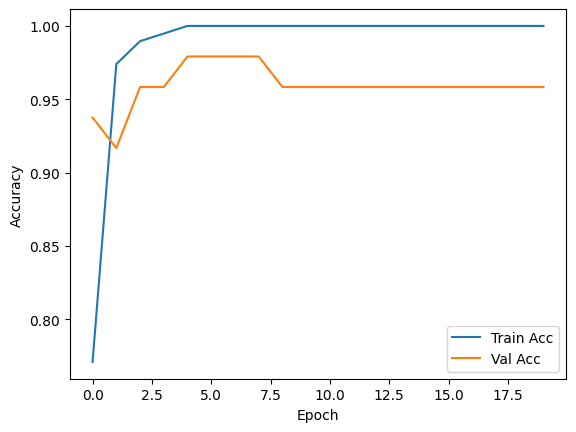

In [12]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Dari grafik tersebut, apa yang bisa Anda interpretasikan?

**Langkah 11 - Simpan Model**

Simpan model untuk kebutuhan produksi.

In [16]:
model.save('day_night_classifier_model.h5')